## CAPSTONE PROJECT - CLASSIFICATION

#### IMPORT PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### READ DATASET

In [2]:
data = pd.read_csv('C:/Users/giryi/Junior DataScientist/reservasi_hotel2.csv')
data.head()

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,company,days_in_waiting_list,tipe_customer,adr,required_car_parking_spaces,status_reservasi
0,Resort Hotel,Tidak,342,2017,July,27,1,0,0,2,...,C,C,3,No Deposit,NaN,0,Transient,0,0.0,Check-Out
1,Resort Hotel,Tidak,737,2017,July,27,1,0,0,2,...,C,C,4,No Deposit,NaN,0,Transient,0,0.0,Check-Out
2,Resort Hotel,Tidak,7,2017,July,27,1,0,1,1,...,A,C,0,No Deposit,NaN,0,Transient,75,0.0,Check-Out
3,Resort Hotel,Tidak,13,2017,July,27,1,0,1,1,...,A,A,0,No Deposit,NaN,0,Transient,75,0.0,Check-Out
4,Resort Hotel,Tidak,14,2017,July,27,1,0,2,2,...,A,A,0,No Deposit,NaN,0,Transient,98,0.0,Check-Out


#### PROBLEM STATEMENT

##### 1.Bagaimana profiling dari customer dan bagaimana karakterisitik customer berdasarkan resort hotel dan city hotel 
##### Melakukan analysis dengan detail, dengan grafik / tabel / penjelasan…

##### 2.Bagaimana karakteristik customer yang melakukan pembatalan dan penerapan apa yang bisa diterapkan untuk meminimalkan customer membatalkan pesanan
##### Melakukan analysis dengan detail, dengan grafik / tabel / penjelasan..

##### 3.Membuat machine learning dan kebijakan berdasarkan model machine learning
##### Melakukan experiment seminimalnya 3 algoritma klasisifikasi agar mendapatkan hasil akurasi yang maksimal

#### DATA PRE-PROCESSING

##### Untuk melihat range data ,type data, dan mengetahui total columns, dan karakteristik data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             119390 non-null  object 
 1   pembatalan                             119390 non-null  object 
 2   waktu_tunggu                           119390 non-null  int64  
 3   tahun_kedatangan                       119390 non-null  int64  
 4   bulan_kedatangan                       119390 non-null  object 
 5   minggu_kedatangan                      119390 non-null  int64  
 6   tanggal_kedatangan                     119390 non-null  int64  
 7   menginap_di_weekend                    119390 non-null  int64  
 8   menginap_in_week_nights                119390 non-null  int64  
 9   dewasa                                 119390 non-null  int64  
 10  anak_anak                              119386 non-null  

##### Untuk melihat data yang missing value

In [4]:
missing = pd.isnull(data).sum()
missing

tipe_hotel                                    0
pembatalan                                    0
waktu_tunggu                                  0
tahun_kedatangan                              0
bulan_kedatangan                              0
minggu_kedatangan                             0
tanggal_kedatangan                            0
menginap_di_weekend                           0
menginap_in_week_nights                       0
dewasa                                        0
anak_anak                                     4
babies                                        0
meal                                          0
negara                                      488
market_segment                                0
tamu_berulang                                 0
pembatalan_sebelumnya                         0
pemesanan_sebelumnya_tidak_dibatalkan         0
tipe_ruang                                    0
tipe_kamar_ditentukan                         0
perubahan_pemesanan                     

##### Untuk melihat rasio data yang mising, jikaa lebih dari 60 %  data akan di hapus saja jika bukan data yang penting juga

In [5]:
rasio = missing.div(len(data))
rasio

tipe_hotel                               0.000000
pembatalan                               0.000000
waktu_tunggu                             0.000000
tahun_kedatangan                         0.000000
bulan_kedatangan                         0.000000
minggu_kedatangan                        0.000000
tanggal_kedatangan                       0.000000
menginap_di_weekend                      0.000000
menginap_in_week_nights                  0.000000
dewasa                                   0.000000
anak_anak                                0.000034
babies                                   0.000000
meal                                     0.000000
negara                                   0.004087
market_segment                           0.000000
tamu_berulang                            0.000000
pembatalan_sebelumnya                    0.000000
pemesanan_sebelumnya_tidak_dibatalkan    0.000000
tipe_ruang                               0.000000
tipe_kamar_ditentukan                    0.000000


##### Drop data company karena melebihi 60 % data hilang,  bahkan 90 % 

In [6]:
data = data.drop(['company'],axis=1)

In [9]:
missing = pd.isnull(data).sum()
missing

tipe_hotel                                   0
pembatalan                                   0
waktu_tunggu                                 0
tahun_kedatangan                             0
bulan_kedatangan                             0
minggu_kedatangan                            0
tanggal_kedatangan                           0
menginap_di_weekend                          0
menginap_in_week_nights                      0
dewasa                                       0
anak_anak                                    4
babies                                       0
meal                                         0
negara                                     488
market_segment                               0
tamu_berulang                                0
pembatalan_sebelumnya                        0
pemesanan_sebelumnya_tidak_dibatalkan        0
tipe_ruang                                   0
tipe_kamar_ditentukan                        0
perubahan_pemesanan                          0
tipe_deposit 

##### melakukan rename kolom parking agar mudah dilihat

In [10]:
data = data.rename(columns={'required_car_parking_spaces':'parking'})

##### Handle missing value pada kolom parking dengan menggantinya dengan nilai rata-rata

In [95]:
data['parking'].fillna(int(data['parking'].mean()), inplace=True)

In [12]:
missing = pd.isnull(data).sum()
missing

tipe_hotel                                   0
pembatalan                                   0
waktu_tunggu                                 0
tahun_kedatangan                             0
bulan_kedatangan                             0
minggu_kedatangan                            0
tanggal_kedatangan                           0
menginap_di_weekend                          0
menginap_in_week_nights                      0
dewasa                                       0
anak_anak                                    4
babies                                       0
meal                                         0
negara                                     488
market_segment                               0
tamu_berulang                                0
pembatalan_sebelumnya                        0
pemesanan_sebelumnya_tidak_dibatalkan        0
tipe_ruang                                   0
tipe_kamar_ditentukan                        0
perubahan_pemesanan                          0
tipe_deposit 

##### Melakukan drop coolom status reservasi karena , status pembatalan sudah mewakili

In [13]:
data = data.drop(['status_reservasi'],axis=1)

In [14]:
missing = pd.isnull(data).sum()
missing

tipe_hotel                                 0
pembatalan                                 0
waktu_tunggu                               0
tahun_kedatangan                           0
bulan_kedatangan                           0
minggu_kedatangan                          0
tanggal_kedatangan                         0
menginap_di_weekend                        0
menginap_in_week_nights                    0
dewasa                                     0
anak_anak                                  4
babies                                     0
meal                                       0
negara                                   488
market_segment                             0
tamu_berulang                              0
pembatalan_sebelumnya                      0
pemesanan_sebelumnya_tidak_dibatalkan      0
tipe_ruang                                 0
tipe_kamar_ditentukan                      0
perubahan_pemesanan                        0
tipe_deposit                               0
days_in_wa

##### handle mising value pada negara dengan melakuakn sebuah kondisi dimana data yang kosong akan menjadi undefined

In [15]:
negara_status =((data['negara'].isnull()) & (data['negara']!=0))

In [16]:
data.loc[data['negara'].isnull(),'negara'] = 'Undefined'

In [17]:
data.isnull().sum()

tipe_hotel                               0
pembatalan                               0
waktu_tunggu                             0
tahun_kedatangan                         0
bulan_kedatangan                         0
minggu_kedatangan                        0
tanggal_kedatangan                       0
menginap_di_weekend                      0
menginap_in_week_nights                  0
dewasa                                   0
anak_anak                                4
babies                                   0
meal                                     0
negara                                   0
market_segment                           0
tamu_berulang                            0
pembatalan_sebelumnya                    0
pemesanan_sebelumnya_tidak_dibatalkan    0
tipe_ruang                               0
tipe_kamar_ditentukan                    0
perubahan_pemesanan                      0
tipe_deposit                             0
days_in_waiting_list                     0
tipe_custom

##### Handle missing value kolom anak anak dengan rata rata

In [18]:
data['anak_anak'].fillna(int(data['anak_anak'].mean()), inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             119390 non-null  object 
 1   pembatalan                             119390 non-null  object 
 2   waktu_tunggu                           119390 non-null  int64  
 3   tahun_kedatangan                       119390 non-null  int64  
 4   bulan_kedatangan                       119390 non-null  object 
 5   minggu_kedatangan                      119390 non-null  int64  
 6   tanggal_kedatangan                     119390 non-null  int64  
 7   menginap_di_weekend                    119390 non-null  int64  
 8   menginap_in_week_nights                119390 non-null  int64  
 9   dewasa                                 119390 non-null  int64  
 10  anak_anak                              119390 non-null  

In [20]:
data.head()

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,pembatalan_sebelumnya,pemesanan_sebelumnya_tidak_dibatalkan,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,days_in_waiting_list,tipe_customer,adr,parking
0,Resort Hotel,Tidak,342,2017,July,27,1,0,0,2,...,0,0,C,C,3,No Deposit,0,Transient,0,0.0
1,Resort Hotel,Tidak,737,2017,July,27,1,0,0,2,...,0,0,C,C,4,No Deposit,0,Transient,0,0.0
2,Resort Hotel,Tidak,7,2017,July,27,1,0,1,1,...,0,0,A,C,0,No Deposit,0,Transient,75,0.0
3,Resort Hotel,Tidak,13,2017,July,27,1,0,1,1,...,0,0,A,A,0,No Deposit,0,Transient,75,0.0
4,Resort Hotel,Tidak,14,2017,July,27,1,0,2,2,...,0,0,A,A,0,No Deposit,0,Transient,98,0.0


##### Melakukan perubahan data dengan encoder pada variabel dependett ( pembatalan )

In [21]:
kategori = ['pembatalan']
df_cat = data[kategori]
df_cat.head()

,pembatalan
0,Tidak
1,Tidak
2,Tidak
3,Tidak
4,Tidak


In [22]:
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in data.columns.values:
            data[feature] = encoded_data.fit_transform(data[feature])

data.head()

,tipe_hotel,pembatalan,waktu_tunggu,tahun_kedatangan,bulan_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,...,pembatalan_sebelumnya,pemesanan_sebelumnya_tidak_dibatalkan,tipe_ruang,tipe_kamar_ditentukan,perubahan_pemesanan,tipe_deposit,days_in_waiting_list,tipe_customer,adr,parking
0,Resort Hotel,0,342,2017,July,27,1,0,0,2,...,0,0,C,C,3,No Deposit,0,Transient,0,0.0
1,Resort Hotel,0,737,2017,July,27,1,0,0,2,...,0,0,C,C,4,No Deposit,0,Transient,0,0.0
2,Resort Hotel,0,7,2017,July,27,1,0,1,1,...,0,0,A,C,0,No Deposit,0,Transient,75,0.0
3,Resort Hotel,0,13,2017,July,27,1,0,1,1,...,0,0,A,A,0,No Deposit,0,Transient,75,0.0
4,Resort Hotel,0,14,2017,July,27,1,0,2,2,...,0,0,A,A,0,No Deposit,0,Transient,98,0.0


In [23]:
data['negara']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: negara, Length: 119390, dtype: object

##### Melakukan proses encoder untuk kolom negara agar mudah untuk melakukan proses eda 

In [24]:
labels = data['negara'].astype('category').cat.categories.tolist()
replace_map_comp = {'negara' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'negara': {'ABW': 1, 'AGO': 2, 'AIA': 3, 'ALB': 4, 'AND': 5, 'ARE': 6, 'ARG': 7, 'ARM': 8, 'ASM': 9, 'ATA': 10, 'ATF': 11, 'AUS': 12, 'AUT': 13, 'AZE': 14, 'BDI': 15, 'BEL': 16, 'BEN': 17, 'BFA': 18, 'BGD': 19, 'BGR': 20, 'BHR': 21, 'BHS': 22, 'BIH': 23, 'BLR': 24, 'BOL': 25, 'BRA': 26, 'BRB': 27, 'BWA': 28, 'CAF': 29, 'CHE': 30, 'CHL': 31, 'CHN': 32, 'CIV': 33, 'CMR': 34, 'CN': 35, 'COL': 36, 'COM': 37, 'CPV': 38, 'CRI': 39, 'CUB': 40, 'CYM': 41, 'CYP': 42, 'CZE': 43, 'DEU': 44, 'DJI': 45, 'DMA': 46, 'DNK': 47, 'DOM': 48, 'DZA': 49, 'ECU': 50, 'EGY': 51, 'ESP': 52, 'EST': 53, 'ETH': 54, 'FIN': 55, 'FJI': 56, 'FRA': 57, 'FRO': 58, 'GAB': 59, 'GBR': 60, 'GEO': 61, 'GGY': 62, 'GHA': 63, 'GIB': 64, 'GLP': 65, 'GNB': 66, 'GRC': 67, 'GTM': 68, 'GUY': 69, 'HKG': 70, 'HND': 71, 'HRV': 72, 'HUN': 73, 'IDN': 74, 'IMN': 75, 'IND': 76, 'IRL': 77, 'IRN': 78, 'IRQ': 79, 'ISL': 80, 'ISR': 81, 'ITA': 82, 'JAM': 83, 'JEY': 84, 'JOR': 85, 'JPN': 86, 'KAZ': 87, 'KEN': 88, 'KHM': 89, 'KIR': 90, 'KNA': 9

#### EDA

##### PEMBATALAN , melihat perbandingan customer yang melakukan pembatalan dengan yang tidak

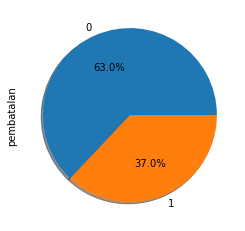

In [25]:
data['pembatalan'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

##### Untuk melihat jumlah data, rata-rata, standart deviasi, kuartal 1 & 2 & 3 , nilai minimum dan maksimum

In [26]:
data.describe()

,pembatalan,waktu_tunggu,tahun_kedatangan,minggu_kedatangan,tanggal_kedatangan,menginap_di_weekend,menginap_in_week_nights,dewasa,anak_anak,babies,tamu_berulang,pembatalan_sebelumnya,pemesanan_sebelumnya_tidak_dibatalkan,perubahan_pemesanan,days_in_waiting_list,adr,parking
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.626761,0.038672
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.523114,0.196342
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000


##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan tipe deposit yang ada

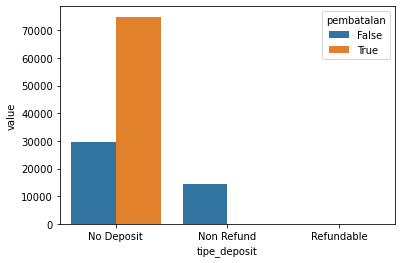

In [27]:
tipe_deposit = pd.crosstab(data['tipe_deposit'], (data['pembatalan']==0))

stacked = tipe_deposit.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.tipe_deposit, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan tipe customer yang ada

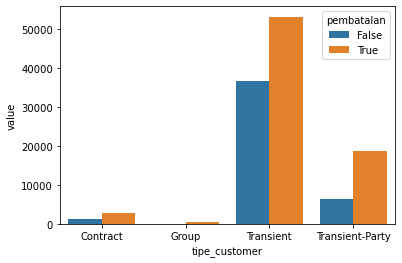

In [28]:
market = pd.crosstab(data['tipe_customer'], (data['pembatalan']==0))

stacked = market.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.tipe_customer, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan market_segment yang ada

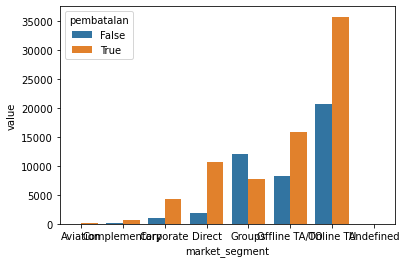

In [29]:
market = pd.crosstab(data['market_segment'], (data['pembatalan']==0))

stacked = market.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.market_segment, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan tipe hotel yang ada

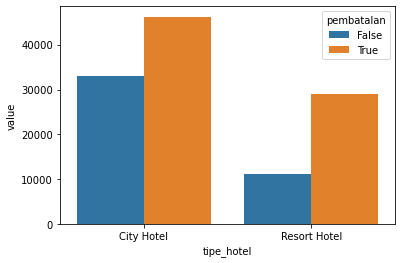

In [30]:
hotel = pd.crosstab(data['tipe_hotel'], (data['pembatalan']==0))

stacked = hotel.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.tipe_hotel, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan kebutuhan parking yang ada

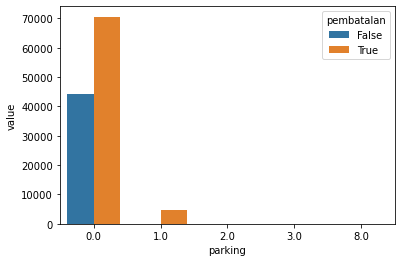

In [31]:
parking = pd.crosstab(data['parking'], (data['pembatalan']==0))

stacked = parking.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.parking, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan tahun yang ada

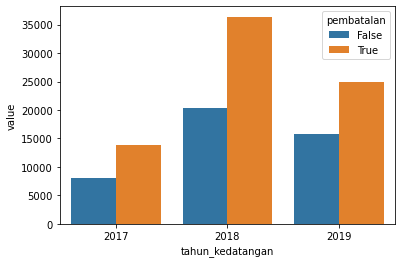

In [32]:
weekend= pd.crosstab(data['tahun_kedatangan'], (data['pembatalan']==0))

stacked = weekend.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.tahun_kedatangan, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan tipe ruang yang ada

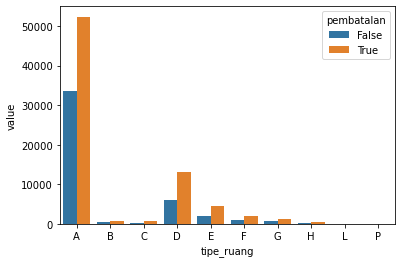

In [33]:
weekend= pd.crosstab(data['tipe_ruang'], (data['pembatalan']==0))

stacked = weekend.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.tipe_ruang, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan market segment yang ada

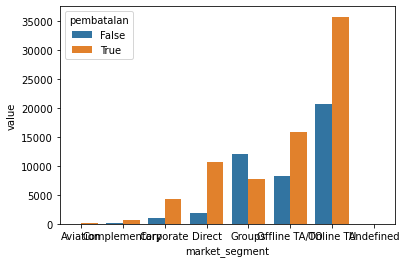

In [34]:
weekend= pd.crosstab(data['market_segment'], (data['pembatalan']==0))

stacked = weekend.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.market_segment, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan dewasa yang ada

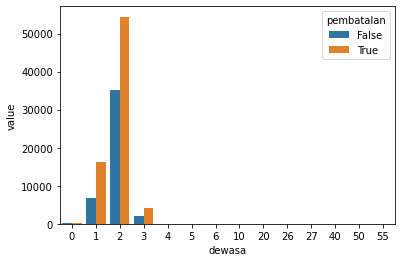

In [35]:
weekend= pd.crosstab(data['dewasa'], (data['pembatalan']==0))

stacked = weekend.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.dewasa, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan nilai babies yang ada

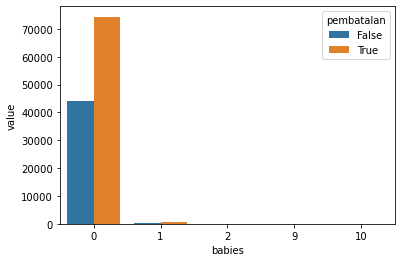

In [36]:
weekend= pd.crosstab(data['babies'], (data['pembatalan']==0))

stacked = weekend.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.babies, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk menganalysis customer yang melakukan pembatalan berdasarkan anak-anak yang ada

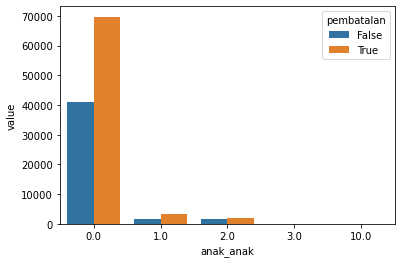

In [37]:
weekend= pd.crosstab(data['anak_anak'], (data['pembatalan']==0))

stacked = weekend.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.anak_anak, y=stacked.value, hue=stacked.pembatalan)
plt.show()

##### Untuk melihat  jumlah tahhun yangh datang jumlah customer secara keseluruhan

In [99]:
country_wise_guests = data[data['pembatalan'] == 1]['tahun_kedatangan'].value_counts().reset_index()
country_wise_guests.columns = ['tahun', 'jumlah_tamu']
country_wise_guests

,tahun,jumlah_tamu
0,2018,20337
1,2019,15745
2,2017,8142


##### Untuk melihat  jumlah negara yangh datang jumlah customer secara keseluruhan

In [39]:
country_wise_guests = data[data['pembatalan'] == 1]['negara'].value_counts().reset_index()
country_wise_guests.columns = ['negara', 'jumlah_tamu']
country_wise_guests

,negara,jumlah_tamu
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
...,...,...
123,UMI,1
124,HND,1
125,FJI,1
126,SYC,1


##### melakukan variabel baru untuk mengalanisysy tiap tipe hotel 
##### data akan dibagi menjadi tipe hotel resort dan city

In [40]:
data_resort = data[(data['tipe_hotel'] == 'Resort Hotel') & (data['pembatalan'] == 1)]
data_city = data[(data['tipe_hotel'] == 'City Hotel') & (data['pembatalan'] == 1)]
data_resort2 = data[(data['tipe_hotel'] == 'Resort Hotel') & (data['pembatalan'] == 0)]
data_city2 = data[(data['tipe_hotel'] == 'City Hotel') & (data['pembatalan'] == 0)]

#### Resort Hotel

#### Total pendatapatan tiap bulanya untuk resort hotel berdasarkan bulan, 
#### Disini saya menganalysys tipe deposit,tipe customer,market segment, dewasa, dan tipe jenis makanan yang dipesan berdasarkan data resort hotel

In [42]:
resort_hotel = data_resort.groupby(['bulan_kedatangan'])['adr'].mean().reset_index()
resort_hotel

,bulan_kedatangan,adr
0,April,82.475921
1,August,197.684789
2,December,70.900158
3,February,58.055346
4,January,53.603077
5,July,166.002089
6,June,115.358491
7,March,59.096986
8,May,83.809570
9,November,46.240781


In [43]:
resort_hotel2 = data_resort2.groupby(['bulan_kedatangan'])['adr'].mean().reset_index()
resort_hotel2

,bulan_kedatangan,adr
0,April,75.654510
1,August,180.944120
2,December,68.129400
3,February,54.027296
4,January,48.603854
5,July,149.844756
6,June,107.646712
7,March,56.878741
8,May,76.439053
9,November,48.494433


In [44]:
resort_hotel = data_resort.groupby(['tahun_kedatangan'])['adr'].mean().reset_index()
resort_hotel.head()

,tahun_kedatangan,adr
0,2017,87.970065
1,2018,98.138742
2,2019,123.981500


In [45]:
resort_hotel2 = data_resort2.groupby(['tahun_kedatangan'])['adr'].mean().reset_index()
resort_hotel2.head()

,tahun_kedatangan,adr
0,2017,89.524773
1,2018,83.708367
2,2019,101.566356


In [46]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['negara'].value_counts().reset_index()
tamu_resort.columns = ['negara', 'jumlah_tamu']
tamu_resort.head()

,negara,jumlah_tamu
0,PRT,7438
1,GBR,891
2,ESP,851
3,IRL,432
4,FRA,211


In [47]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['negara'].value_counts().reset_index()
tamu_resort2.columns = ['negara', 'jumlah_tamu']
tamu_resort2.head()

,negara,jumlah_tamu
0,PRT,10192
1,GBR,5923
2,ESP,3106
3,IRL,1734
4,FRA,1400


In [48]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['dewasa'].value_counts().reset_index()
tamu_resort.columns = ['dewasa', 'jumlah_tamu']
tamu_resort.head()

,dewasa,jumlah_tamu
0,2,9502
1,1,1220
2,3,373
3,4,9
4,26,5


In [49]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['dewasa'].value_counts().reset_index()
tamu_resort2.columns = ['dewasa', 'jumlah_tamu']
tamu_resort2.head()

,dewasa,jumlah_tamu
0,2,21923
1,1,5928
2,3,1054
3,4,22
4,0,11


In [50]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['anak_anak'].value_counts().reset_index()
tamu_resort.columns = ['anak', 'jumlah_tamu']
tamu_resort

,anak,jumlah_tamu
0,0.0,9808
1,2.0,753
2,1.0,558
3,3.0,2
4,10.0,1


In [51]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['anak_anak'].value_counts().reset_index()
tamu_resort2.columns = ['anak', 'jumlah_tamu']
tamu_resort2

,anak,jumlah_tamu
0,0.0,26768
1,1.0,1280
2,2.0,875
3,3.0,15


In [53]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['market_segment'].value_counts().reset_index()
tamu_resort.columns = ['market_segment', 'jumlah_tamu']
tamu_resort.head()

,market_segment,jumlah_tamu
0,Online TA,6248
1,Groups,2474
2,Offline TA/TO,1138
3,Direct,878
4,Corporate,351


In [54]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['market_segment'].value_counts().reset_index()
tamu_resort2.columns = ['market_segment', 'jumlah_tamu']
tamu_resort2.head()

,market_segment,jumlah_tamu
0,Online TA,11481
1,Offline TA/TO,6334
2,Direct,5635
3,Groups,3362
4,Corporate,1958


In [55]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['tipe_deposit'].value_counts().reset_index()
tamu_resort.columns = ['tipe_deposit', 'jumlah_tamu']
tamu_resort

,tipe_deposit,jumlah_tamu
0,No Deposit,9450
1,Non Refund,1650
2,Refundable,22


In [56]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['tipe_deposit'].value_counts().reset_index()
tamu_resort2.columns = ['tipe_deposit', 'jumlah_tamu']
tamu_resort2

,tipe_deposit,jumlah_tamu
0,No Deposit,28749
1,Refundable,120
2,Non Refund,69


In [57]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['tipe_customer'].value_counts().reset_index()
tamu_resort.columns = ['customer', 'jumlah_tamu']
tamu_resort

,customer,jumlah_tamu
0,Transient,9416
1,Transient-Party,1519
2,Contract,157
3,Group,30


In [58]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['tipe_customer'].value_counts().reset_index()
tamu_resort2.columns = ['customer', 'jumlah_tamu']
tamu_resort2

,customer,jumlah_tamu
0,Transient,20793
1,Transient-Party,6272
2,Contract,1619
3,Group,254


In [59]:
tamu_resort = data_resort[data_resort['pembatalan'] == 1]['meal'].value_counts().reset_index()
tamu_resort.columns = ['jenis_makanan', 'jumlah_tamu']
tamu_resort

,jenis_makanan,jumlah_tamu
0,BB,7843
1,HB,2547
2,FB,443
3,Undefined,286
4,SC,3


In [60]:
tamu_resort2 = data_resort2[data_resort2['pembatalan'] == 0]['meal'].value_counts().reset_index()
tamu_resort2.columns = ['jenis_makanan', 'jumlah_tamu']
tamu_resort2

,jenis_makanan,jumlah_tamu
0,BB,22162
1,HB,5499
2,Undefined,883
3,FB,311
4,SC,83


#### CITY Hotel

#### Disini saya menganalysys tipe deposit,tipe customer,market segment, dewasa, dan tipe jenis makanan yang dipesan berdasarkan data city hotel

In [64]:
import matplotlib.pyplot as plt
city_hotel = city_hotel = data_city.groupby(['bulan_kedatangan'])['adr'].mean().reset_index()
city_hotel


,bulan_kedatangan,adr
0,April,110.391342
1,August,108.869795
2,December,89.872989
3,February,83.163072
4,January,83.139001
5,July,103.506050
6,June,120.654762
7,March,96.636211
8,May,123.005201
9,November,90.415412


In [65]:
city_hotel = data_city.groupby(['tahun_kedatangan'])['adr'].mean().reset_index()
city_hotel

,tahun_kedatangan,adr
0,2017,83.139074
1,2018,102.389693
2,2019,118.272261


In [67]:
tamu_city = data_city[data_city['pembatalan'] == 1]['negara'].value_counts().reset_index()
tamu_city.columns = ['negara', 'jumlah_tamu']
tamu_city.head()

,negara,jumlah_tamu
0,PRT,20081
1,FRA,1723
2,GBR,1562
3,ESP,1326
4,ITA,1253


In [68]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['negara'].value_counts().reset_index()
tamu_city2.columns = ['negara', 'jumlah_tamu']
tamu_city2.head()

,negara,jumlah_tamu
0,PRT,10879
1,FRA,7081
2,DEU,5012
3,GBR,3753
4,ESP,3285


In [62]:
tamu_city = data_city[data_city['pembatalan'] == 1]['dewasa'].value_counts().reset_index()
tamu_city.columns = ['dewasa', 'jumlah_tamu']
tamu_city

,dewasa,jumlah_tamu
0,2,25756
1,1,5454
2,3,1778
3,0,107
4,4,7


In [63]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['dewasa'].value_counts().reset_index()
tamu_city2.columns = ['dewasa', 'jumlah_tamu']
tamu_city2

,dewasa,jumlah_tamu
0,2,32499
1,1,10425
2,3,2997
3,0,283
4,4,24


In [64]:
tamu_city = data_city[data_city['anak_anak'] == 1]['dewasa'].value_counts().reset_index()
tamu_city.columns = ['anak_anak', 'jumlah_tamu']
tamu_city

,anak_anak,jumlah_tamu
0,2,938
1,1,48
2,3,23


In [65]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['anak_anak'].value_counts().reset_index()
tamu_city2.columns = ['anak_anak', 'jumlah_tamu']
tamu_city2

,anak_anak,jumlah_tamu
0,0.0,42934
1,1.0,2014
2,2.0,1236
3,3.0,44


In [66]:
tamu_city = data_city[data_city['pembatalan'] == 1]['meal'].value_counts().reset_index()
tamu_city.columns = ['meeal', 'jumlah_tamu']
tamu_city

,meeal,jumlah_tamu
0,BB,26667
1,SC,3963
2,HB,2437
3,FB,35


In [67]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['meal'].value_counts().reset_index()
tamu_city2.columns = ['meal', 'jumlah_tamu']
tamu_city2

,meal,jumlah_tamu
0,BB,35638
1,SC,6601
2,HB,3980
3,FB,9


In [69]:
tamu_city = data_city[data_city['pembatalan'] == 1]['market_segment'].value_counts().reset_index()
tamu_city.columns = ['market_segment', 'jumlah_tamu']
tamu_city.head()

,market_segment,jumlah_tamu
0,Online TA,14491
1,Groups,9623
2,Offline TA/TO,7173
3,Direct,1056
4,Corporate,641


In [70]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['market_segment'].value_counts().reset_index()
tamu_city2.columns = ['market_segment', 'jumlah_tamu']
tamu_city2.head()

,market_segment,jumlah_tamu
0,Online TA,24257
1,Offline TA/TO,9574
2,Direct,5037
3,Groups,4352
4,Corporate,2345


In [70]:
tamu_city = data_city[data_city['pembatalan'] == 1]['tipe_deposit'].value_counts().reset_index()
tamu_city.columns = ['tipe_deposit', 'jumlah_tamu']
tamu_city

,tipe_deposit,jumlah_tamu
0,No Deposit,20244
1,Non Refund,12844
2,Refundable,14


In [71]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['tipe_deposit'].value_counts().reset_index()
tamu_city2.columns = ['tipe_deposit', 'jumlah_tamu']
tamu_city2

,tipe_deposit,jumlah_tamu
0,No Deposit,46198
1,Non Refund,24
2,Refundable,6


In [72]:
tamu_city = data_city[data_city['pembatalan'] == 1]['tipe_customer'].value_counts().reset_index()
tamu_city.columns = ['tipe_customer', 'jumlah_tamu']
tamu_city

,tipe_customer,jumlah_tamu
0,Transient,27098
1,Transient-Party,4870
2,Contract,1105
3,Group,29


In [73]:
tamu_city2 = data_city2[data_city2['pembatalan'] == 0]['tipe_customer'].value_counts().reset_index()
tamu_city2.columns = ['tipe_customer', 'jumlah_tamu']
tamu_city2

,tipe_customer,jumlah_tamu
0,Transient,32306
1,Transient-Party,12463
2,Contract,1195
3,Group,264


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             119390 non-null  object 
 1   pembatalan                             119390 non-null  int32  
 2   waktu_tunggu                           119390 non-null  int64  
 3   tahun_kedatangan                       119390 non-null  int64  
 4   bulan_kedatangan                       119390 non-null  object 
 5   minggu_kedatangan                      119390 non-null  int64  
 6   tanggal_kedatangan                     119390 non-null  int64  
 7   menginap_di_weekend                    119390 non-null  int64  
 8   menginap_in_week_nights                119390 non-null  int64  
 9   dewasa                                 119390 non-null  int64  
 10  anak_anak                              119390 non-null  

#### Feature Engeineering

##### Disini menganalysys hubungan antara variabel ( korelasi ) dengan heat map

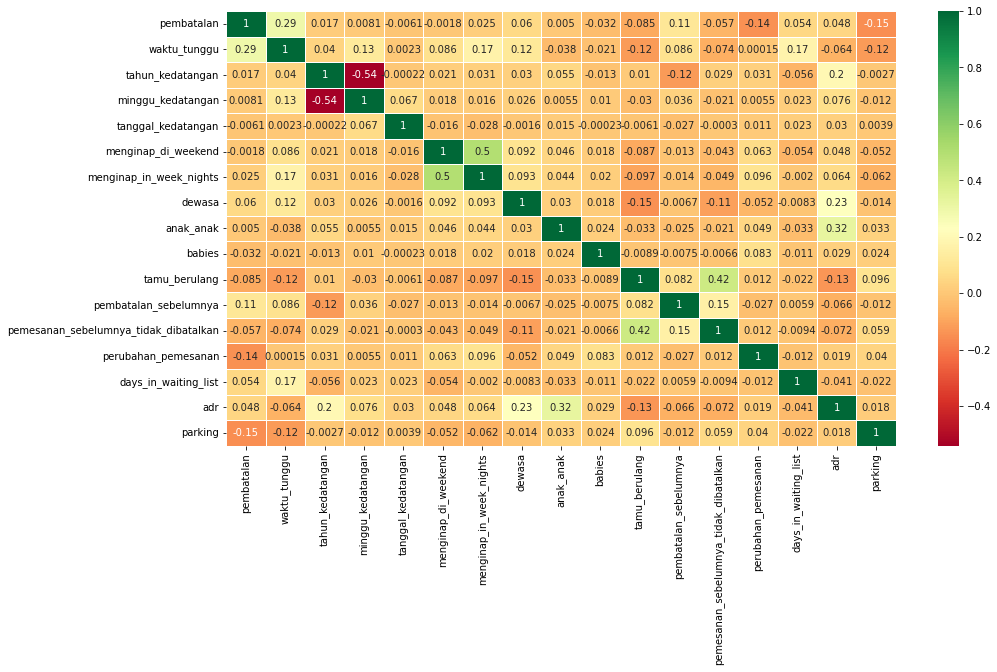

In [75]:
sns.heatmap(data.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

##### Terlihat bahwa variabel memiliki hubungan terhadap variabel dependentnya

In [76]:
korelasi = data.corr()["pembatalan"].sort_values()
korelasi

parking                                 -0.151077
perubahan_pemesanan                     -0.144381
tamu_berulang                           -0.084793
pemesanan_sebelumnya_tidak_dibatalkan   -0.057358
babies                                  -0.032491
tanggal_kedatangan                      -0.006130
menginap_di_weekend                     -0.001791
anak_anak                                0.005036
minggu_kedatangan                        0.008148
tahun_kedatangan                         0.016660
menginap_in_week_nights                  0.024765
adr                                      0.047921
days_in_waiting_list                     0.054186
dewasa                                   0.060017
pembatalan_sebelumnya                    0.110133
waktu_tunggu                             0.293123
pembatalan                               1.000000
Name: pembatalan, dtype: float64

##### memilih variabel independet dan dependent

In [71]:
data_baru = data[['tipe_deposit','tipe_customer','tipe_hotel','parking','market_segment',
                      'dewasa','tipe_ruang','pembatalan','tamu_berulang','adr','anak_anak','babies']]
data_baru.head()

,tipe_deposit,tipe_customer,tipe_hotel,parking,market_segment,dewasa,tipe_ruang,pembatalan,tamu_berulang,adr,anak_anak,babies
0,No Deposit,Transient,Resort Hotel,0.0,Direct,2,C,0,0,0,0.0,0
1,No Deposit,Transient,Resort Hotel,0.0,Direct,2,C,0,0,0,0.0,0
2,No Deposit,Transient,Resort Hotel,0.0,Direct,1,A,0,0,75,0.0,0
3,No Deposit,Transient,Resort Hotel,0.0,Corporate,1,A,0,0,75,0.0,0
4,No Deposit,Transient,Resort Hotel,0.0,Online TA,2,A,0,0,98,0.0,0


In [72]:
# data_baru.to_csv('newdata_testing_hotel.csv', index=False)
# print('sukess') 

In [73]:
data_baru.isna().sum()

tipe_deposit      0
tipe_customer     0
tipe_hotel        0
parking           0
market_segment    0
dewasa            0
tipe_ruang        0
pembatalan        0
tamu_berulang     0
adr               0
anak_anak         0
babies            0
dtype: int64

In [74]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tipe_deposit    119390 non-null  object 
 1   tipe_customer   119390 non-null  object 
 2   tipe_hotel      119390 non-null  object 
 3   parking         119390 non-null  float64
 4   market_segment  119390 non-null  object 
 5   dewasa          119390 non-null  int64  
 6   tipe_ruang      119390 non-null  object 
 7   pembatalan      119390 non-null  int32  
 8   tamu_berulang   119390 non-null  int64  
 9   adr             119390 non-null  int64  
 10  anak_anak       119390 non-null  float64
 11  babies          119390 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 10.5+ MB


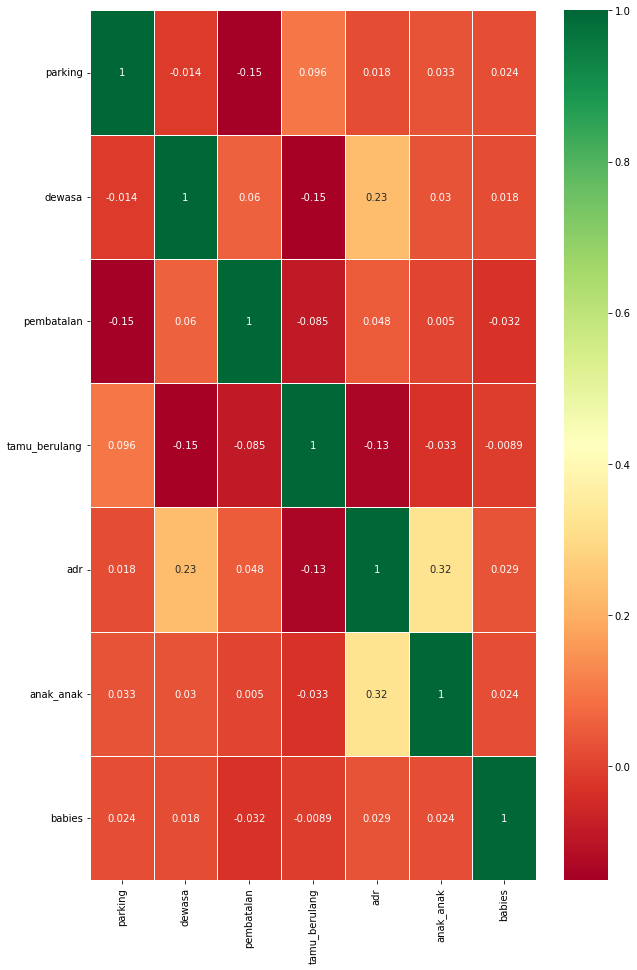

In [75]:
sns.heatmap(data_baru.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,16)
plt.show()

##### Melakukan proses encoder untuk data category

In [76]:
kategori = ['tipe_customer','tipe_hotel','market_segment','tipe_ruang','tipe_deposit']
df_cat = data_baru[kategori]
df_cat.head()

,tipe_customer,tipe_hotel,market_segment,tipe_ruang,tipe_deposit
0,Transient,Resort Hotel,Direct,C,No Deposit
1,Transient,Resort Hotel,Direct,C,No Deposit
2,Transient,Resort Hotel,Direct,A,No Deposit
3,Transient,Resort Hotel,Corporate,A,No Deposit
4,Transient,Resort Hotel,Online TA,A,No Deposit


In [77]:
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in data_baru.columns.values:
            data_baru[feature] = encoded_data.fit_transform(data_baru[feature])

data_baru.head()

C:\Users\giryi\AppData\Local\Temp/ipykernel_6068/801808329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baru[feature] = encoded_data.fit_transform(data_baru[feature])


,tipe_deposit,tipe_customer,tipe_hotel,parking,market_segment,dewasa,tipe_ruang,pembatalan,tamu_berulang,adr,anak_anak,babies
0,0,2,1,0.0,3,2,2,0,0,0,0.0,0
1,0,2,1,0.0,3,2,2,0,0,0,0.0,0
2,0,2,1,0.0,3,1,0,0,0,75,0.0,0
3,0,2,1,0.0,2,1,0,0,0,75,0.0,0
4,0,2,1,0.0,6,2,0,0,0,98,0.0,0


#### Modeling & Evaluation

In [78]:
X = data_baru.drop('pembatalan', axis=1)
y = data_baru['pembatalan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  83573
y Train :  83573
X Test :  35817
t Test :  35817


#### SVM

In [79]:
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [80]:
X_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_pred,y_train)
print('Accuracy on training data : ', training_data_accuracy)



Accuracy on training data :  0.772270948751391


In [81]:
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7608956640701343


#### Randomforest

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=5))

In [108]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

In [109]:
acc = model.score(X_train,y_train)*100
accuracies = {}
accuracies['RandomForestClassifier'] = acc
print("Test Accuracy of Randomforest Algorithm: {:.2f}%".format(acc))

Test Accuracy of Randomforest Algorithm: 75.09%


In [114]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     31403
           1       0.33      0.99      0.49      4414

    accuracy                           0.75     35817
   macro avg       0.66      0.85      0.66     35817
weighted avg       0.92      0.75      0.79     35817



In [123]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.751


#### KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
y_pred_knn = knn.predict(X_test)

In [119]:
acc = knn.score(X_train,y_train)*100
accuracies = {}
accuracies['RandomForestClassifier'] = acc
print("Test Accuracy of Randomforest Algorithm: {:.2f}%".format(acc))

Test Accuracy of Randomforest Algorithm: 76.38%


In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     31403
           1       0.33      0.99      0.49      4414

    accuracy                           0.75     35817
   macro avg       0.66      0.85      0.66     35817
weighted avg       0.92      0.75      0.79     35817



In [124]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_train, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.734


### LOAD AND PREDICT NEW DATA

In [83]:
import pickle
filename = 'model_svm.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [87]:
import joblib
loaded_model = joblib.load('C:/Users/giryi/Junior DataScientist/model_svm.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.7608956640701343


### KESIMPULAN/SARAN

#### Solusi \ kebijakan  yang bisa dilakukan adalah : 
 
##### -tingkatkan pelayanan yang baik  
##### -lengkapi fasilitas hotel terutama fasilitas keluarga yang seru  
##### -sebuah promosi untuk bulan madu 
##### -lebih ditingkatkan kemewahan dan kenyamanan terutama untuk resort hotel
##### -pertimbangkan untuk menwarkan hara tidak non refund
##### -tawarkan harga yang menarik
##### -validasi pembayaran dimuka
##### -bisa berbagai metode pembayaran